Datos cargados:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Forma de los datos: (200, 5)

Variables predictoras:
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Variable objetivo:
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

Datos de entrenamiento: (160, 3)
Datos de prueba: (40, 3)

Resultados del modelo:
Error cuadrático medio (MSE): 3.17
Coeficiente de determinación (R²): 0.90

Coeficientes del modelo:
Intercepto: 2.98
TV: 0.04
Radio: 0.19
Newspaper: 0.00

Ecuación del modelo:
Sales = 2.98 + 0.04*TV + 0.19*Radio + 0.00*Newspaper

Predicción ejemplo (TV=100, Radio=50, Newspaper=25): 16.98


c:\Users\usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


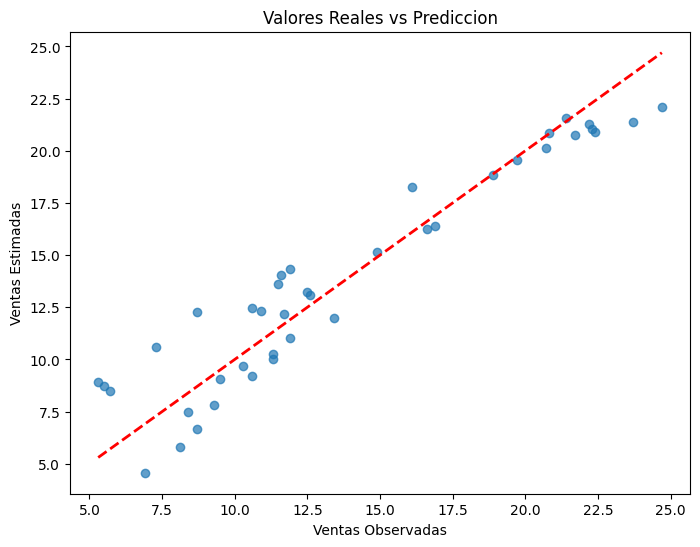


Métricas adicionales:
MAE: 1.46
RMSE: 1.78


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("datos_publicidad.csv")

print("Datos cargados:")
print(data.head())
print(f"\nForma de los datos: {data.shape}")

X = data[['TV', 'radio', 'newspaper']]  
y = data['sales']  

print(f"\nVariables predictoras:\n{X.head()}")
print(f"\nVariable objetivo:\n{y.head()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDatos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#predicciones
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

print(f"\nCoeficientes del modelo:")
print(f"Intercepto: {modelo.intercept_:.2f}")
print(f"TV: {modelo.coef_[0]:.2f}")
print(f"Radio: {modelo.coef_[1]:.2f}")
print(f"Newspaper: {modelo.coef_[2]:.2f}")

# Ecuación del modelo
print(f"\nEcuación del modelo:")
print(f"Sales = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f}*TV + {modelo.coef_[1]:.2f}*Radio + {modelo.coef_[2]:.2f}*Newspaper")


ejemplo = [[100, 50, 25]]  
prediccion = modelo.predict(ejemplo)
print(f"\nPredicción ejemplo (TV=100, Radio=50, Newspaper=25): {prediccion[0]:.2f}")

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Ventas Observadas')
plt.ylabel('Ventas Estimadas')
plt.title('Valores Reales vs Prediccion')
plt.show()

mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(mse)
print(f"\nMétricas adicionales:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

